In [1]:
import platform
import PIL  # Pillow 包通常在 Python 中以 PIL 名称导入
import jupyterlab
import matplotlib
import ipympl
import numpy as np
import pandas as pd

# 打印 Python 版本
print("Python version:", platform.python_version())

# 打印 Pillow 版本
print("Pillow version:", PIL.__version__)

# 打印 JupyterLab 版本
print("JupyterLab version:", jupyterlab.__version__)

# 打印 matplotlib 版本
print("matplotlib version:", matplotlib.__version__)

# 打印 ipympl 版本
print("ipympl version:", ipympl.__version__)


# Python version: 3.10.16
# Pillow version: 11.1.0
# JupyterLab version: 4.3.5
# matplotlib version: 3.10.0
# ipympl version: 0.9.6


Python version: 3.10.16
Pillow version: 11.1.0
JupyterLab version: 4.3.5
matplotlib version: 3.10.0
ipympl version: 0.9.6


In [2]:
# print current directory
import os
print("Current directory:", os.getcwd())

Current directory: c:\Users\mingzhchen\Documents\Git\Open_flow\20250407


In [3]:
import sys
# append the current directory to sys.path
sys.path.append("..")
from openflow import InteractivePolygonGating, InteractiveHistogramThreshold
from utils import *
from utils_plots import *

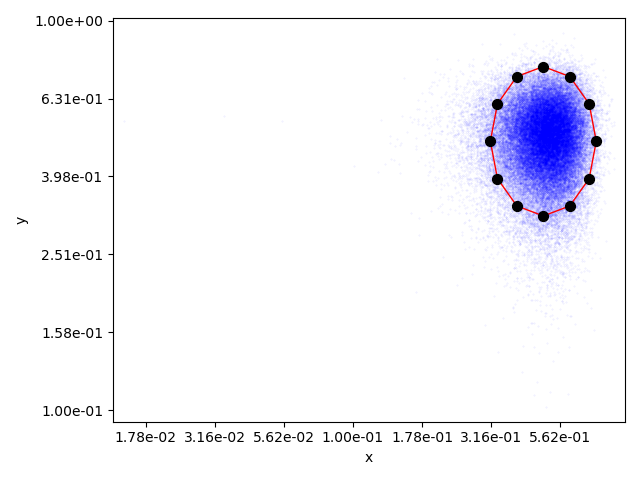

In [4]:
%matplotlib widget
# Example usage:
if __name__ == "__main__":
    np.random.seed(0)
    # Generate sample data using normal distribution
    data = {
        'x': np.random.normal(0.5, 0.1, 60000),
        'y': np.random.normal(0.5, 0.1, 60000)
    }
    df = pd.DataFrame(data)

    # Create an instance of InteractivePolygonGating with 5 vertices and logarithmic scale enabled.
    gate1 = InteractivePolygonGating(df, 'x', 'y', num_edges=12, log=True)
    # As you drag the polygon the histograms and scatter plot will update.



In [5]:
import shutil
data_path = r'D:\FACS\Exp_20251028_1'
data_source_path = r'Z:\cytoflex\Exp_20251028_1'


In [7]:
# Copy data folder from data_source_path to data_path, if data_path directory doesn't exist, create it
shutil.copytree(data_source_path, data_path, dirs_exist_ok=True)

'D:\\FACS\\Exp_20251028_1'

          FSC-H         FSC-A         SSC-H       SSC-A       FITC-H  \
0  3.939521e+06  1.000214e+07  5.652597e+06  15823600.0  389135.8125   
1  3.748755e+06  1.415618e+07  5.516404e+06  14712108.0  367891.3125   
2  3.648734e+06  8.732001e+06  5.595407e+06  11056128.0  471146.1875   
3  4.008960e+06  1.187148e+07  5.647032e+06  14032998.0  298996.5000   
4  8.412923e+05  6.611109e+05  2.781167e+05    248700.0   17020.0000   

          FITC-A       APC-H       APC-A     mCherry-H     mCherry-A  \
0  654687.375000  290.899994  347.799988  11742.900391  22778.500000   
1  882311.875000  351.100006  284.399994  14845.500000  30705.300781   
2  810443.875000  331.299988  337.100006  23396.099609  46579.601562   
3  566130.125000  326.399994  240.699997   1850.900024   3459.100098   
4   15843.900391   47.000000 -286.799988    171.500000      6.200000   

     FSC-Width   Time  
0  2599.856689    0.0  
1  3866.866455    3.0  
2  2450.598877   23.0  
3  3032.312988   79.0  
4   804.691345

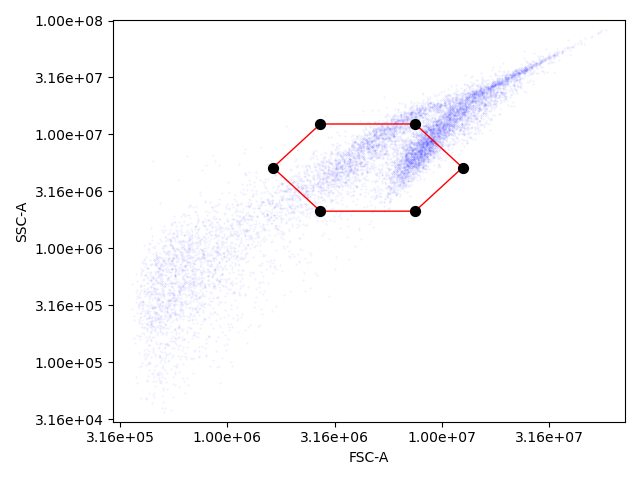

In [6]:

import FlowCal
import pandas as pd


# Read the example .facs file
test_file_path = data_path + '/01-Well-A1.fcs'
data = FlowCal.io.FCSData(test_file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data._channel_labels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate1 = InteractivePolygonGating(filtered_df, 'FSC-A', 'SSC-A', num_edges=6, log=True)


In [11]:
data.__dict__

{'_infile': 'D:\\FACS\\Exp_20251028_1/01-Well-A1.fcs',
 '_text': {'$BEGINSTEXT': '0',
  '$ENDSTEXT': '0',
  '$BEGINDATA': '0000000000006688',
  '$ENDDATA': '0000000000486687',
  '$BEGINANALYSIS': '0',
  '$ENDANALYSIS': '0',
  '$TOT': '0000000000010000',
  'FILVER': '1',
  '$FIL': '01-Well-A1.fcs',
  '$SYS': 'Microsoft Windows NT 6.2.9200.0',
  '$MODE': 'L',
  '$BYTEORD': '1,2,3,4',
  '$DATATYPE': 'F',
  '$NEXTDATA': '0',
  'CYTEXPERTFIL': 'True',
  'TBID': '555b17d8-8eaa-4f18-ba98-1ec67514b211',
  'TBNM': '01-Well-A1',
  '$PAR': '12',
  '$BTIM': '18:47:10',
  '$ETIM': '18:47:31',
  '$DATE': '28-Oct-2025',
  '$CYT': 'CytoFLEX S',
  'RCTOT': '10000',
  'USRCTOT': 'True',
  'CGNM': 'All Events ',
  'RCTIM': '34',
  'USRCTIM': 'True',
  '$SPILLOVER': '6,FL5-H,FL11-H,FL8-H,FL5-A,FL11-A,FL8-A,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1',
  'RCVOL': '10',
  'USRCVOL': 'False',
  '$TIMESTEP': '0.00002',
  '$P1N': 'FSC-H',
  '$P1S': 'FSC-H',
  '$P1R': '16777216',
  '

In [12]:
data._channel_labels

('FSC-H',
 'FSC-A',
 'SSC-H',
 'SSC-A',
 'FITC-H',
 'FITC-A',
 'APC-H',
 'APC-A',
 'mCherry-H',
 'mCherry-A',
 'FSC-Width',
 'Time')

| 通道          | 对应荧光分子                            |
| :---------- | :-------------------------------- |
| **FITC**    | GFP, mGreenLantern                |
| **mCherry** | Cy3, mCherry, **mScarlet, mRuby** |
| **APC**     | APC, Cy5（远红）                      |

while need double check, generated from gpt

In [13]:
data.channels

('FSC-H',
 'FSC-A',
 'SSC-H',
 'SSC-A',
 'FL5-H',
 'FL5-A',
 'FL11-H',
 'FL11-A',
 'FL8-H',
 'FL8-A',
 'FSC-Width',
 'Time')

In [14]:
df2 = gate1.selected_data
print(df2.head())

        FSC-H       FSC-A      SSC-H       SSC-A        FITC-H      FITC-A  \
0  3939521.00  10002136.0  5652597.0  15823600.0  389135.81250  654687.375   
1  3748755.25  14156175.0  5516404.0  14712108.0  367891.31250  882311.875   
2  3648734.50   8732001.0  5595407.0  11056128.0  471146.18750  810443.875   
3  4008959.50  11871483.0  5647031.5  14032998.0  298996.50000  566130.125   
5  3511512.00   7688125.5  5296131.5   9102662.0  328580.59375  506544.000   

        APC-H       APC-A     mCherry-H     mCherry-A    FSC-Width   Time  
0  290.899994  347.799988  11742.900391  22778.500000  2599.856689    0.0  
1  351.100006  284.399994  14845.500000  30705.300781  3866.866455    3.0  
2  331.299988  337.100006  23396.099609  46579.601562  2450.598877   23.0  
3  326.399994  240.699997   1850.900024   3459.100098  3032.312988   79.0  
5  325.899994  168.600006   5029.600098   9008.200195  2241.956787  353.0  


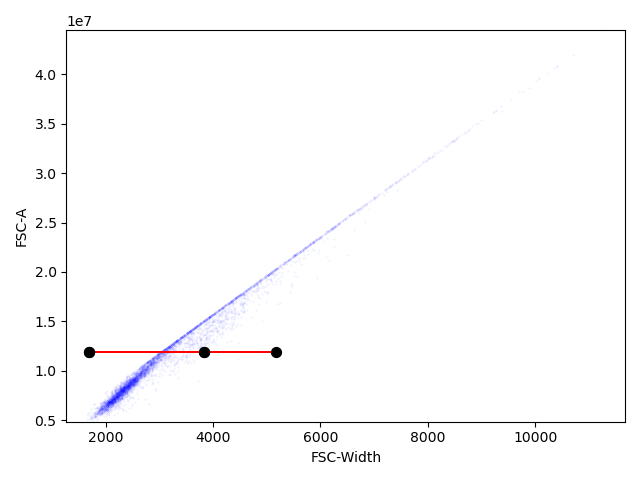

In [15]:
# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate2 = InteractivePolygonGating(df2, 'FSC-Width', 'FSC-A', num_edges=5, log=False)


In [16]:
df3 = gate2.selected_data
print(df3.head())

        FSC-H       FSC-A      SSC-H       SSC-A        FITC-H      FITC-A  \
0  3939521.00  10002136.0  5652597.0  15823600.0  389135.81250  654687.375   
1  3748755.25  14156175.0  5516404.0  14712108.0  367891.31250  882311.875   
2  3648734.50   8732001.0  5595407.0  11056128.0  471146.18750  810443.875   
3  4008959.50  11871483.0  5647031.5  14032998.0  298996.50000  566130.125   
5  3511512.00   7688125.5  5296131.5   9102662.0  328580.59375  506544.000   

        APC-H       APC-A     mCherry-H     mCherry-A    FSC-Width   Time  
0  290.899994  347.799988  11742.900391  22778.500000  2599.856689    0.0  
1  351.100006  284.399994  14845.500000  30705.300781  3866.866455    3.0  
2  331.299988  337.100006  23396.099609  46579.601562  2450.598877   23.0  
3  326.399994  240.699997   1850.900024   3459.100098  3032.312988   79.0  
5  325.899994  168.600006   5029.600098   9008.200195  2241.956787  353.0  


Number of selected items: 1877


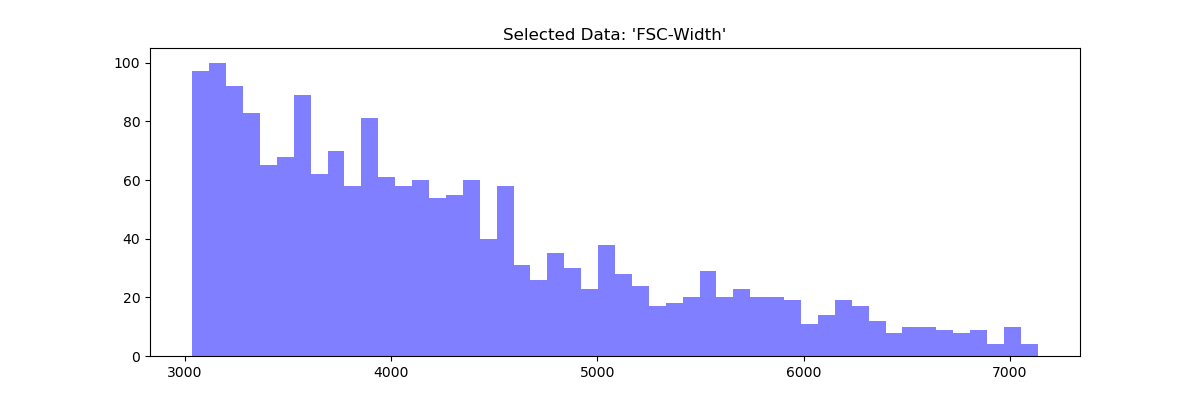

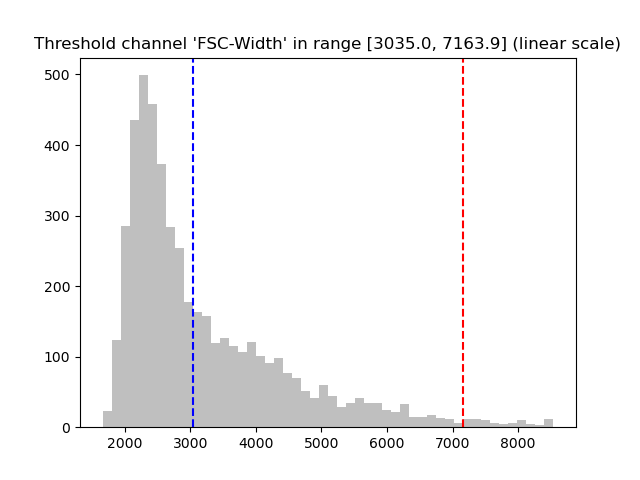

In [17]:
gate3 = InteractiveHistogramThreshold(
    data=df3,
    threshold_channel='FSC-Width',
    plot_channels=['FSC-Width']
)

In [18]:
# Get Valid range of singlet
df4 = gate3.selected_data
print(df4.head())
df4

        FSC-H       FSC-A      SSC-H       SSC-A        FITC-H      FITC-A  \
0  3939521.00  10002136.0  5652597.0  15823600.0  389135.81250  654687.375   
1  3748755.25  14156175.0  5516404.0  14712108.0  367891.31250  882311.875   
2  3648734.50   8732001.0  5595407.0  11056128.0  471146.18750  810443.875   
3  4008959.50  11871483.0  5647031.5  14032998.0  298996.50000  566130.125   
5  3511512.00   7688125.5  5296131.5   9102662.0  328580.59375  506544.000   

        APC-H       APC-A     mCherry-H     mCherry-A    FSC-Width   Time  
0  290.899994  347.799988  11742.900391  22778.500000  2599.856689    0.0  
1  351.100006  284.399994  14845.500000  30705.300781  3866.866455    3.0  
2  331.299988  337.100006  23396.099609  46579.601562  2450.598877   23.0  
3  326.399994  240.699997   1850.900024   3459.100098  3032.312988   79.0  
5  325.899994  168.600006   5029.600098   9008.200195  2241.956787  353.0  


,FSC-H,FSC-A,SSC-H,SSC-A,FITC-H,FITC-A,APC-H,APC-A,mCherry-H,mCherry-A,FSC-Width,Time
0,3939521.00,10002136.0,5652597.0,15823600.0,389135.812500,654687.37500,290.899994,347.799988,11742.900391,22778.500000,2599.856689,0.0
1,3748755.25,14156175.0,5516404.0,14712108.0,367891.312500,882311.87500,351.100006,284.399994,14845.500000,30705.300781,3866.866455,3.0
2,3648734.50,8732001.0,5595407.0,11056128.0,471146.187500,810443.87500,331.299988,337.100006,23396.099609,46579.601562,2450.598877,23.0
3,4008959.50,11871483.0,5647031.5,14032998.0,298996.500000,566130.12500,326.399994,240.699997,1850.900024,3459.100098,3032.312988,79.0
5,3511512.00,7688125.5,5296131.5,9102662.0,328580.593750,506544.00000,325.899994,168.600006,5029.600098,9008.200195,2241.956787,353.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,3386086.50,7405800.5,3586174.0,5971033.0,250544.203125,435310.59375,351.299988,12.100000,1145.000000,1969.699951,2239.622070,1046109.0
9984,3685485.25,7869445.0,4723463.0,8370692.0,266510.906250,426363.68750,387.899994,163.399994,4561.700195,8977.400391,2186.502686,1046243.0
9994,3648744.25,8186924.5,5099897.0,8978419.0,98396.601562,141642.40625,301.799988,304.299988,741.900024,677.900024,2297.615479,1047809.0
9997,3085266.75,6084756.5,3821493.5,5691911.0,311058.187500,478818.90625,391.799988,235.699997,9572.700195,17420.699219,2019.532227,1048073.0


Number of selected items: 3425


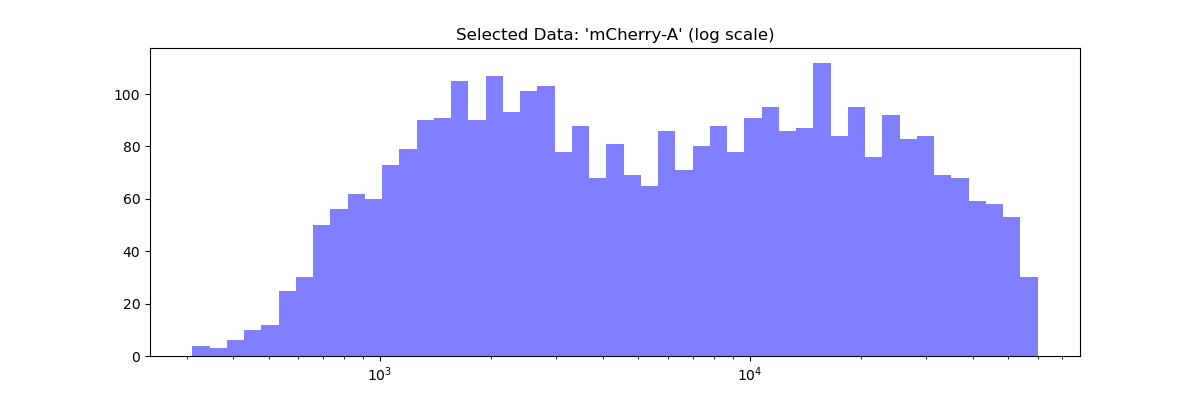

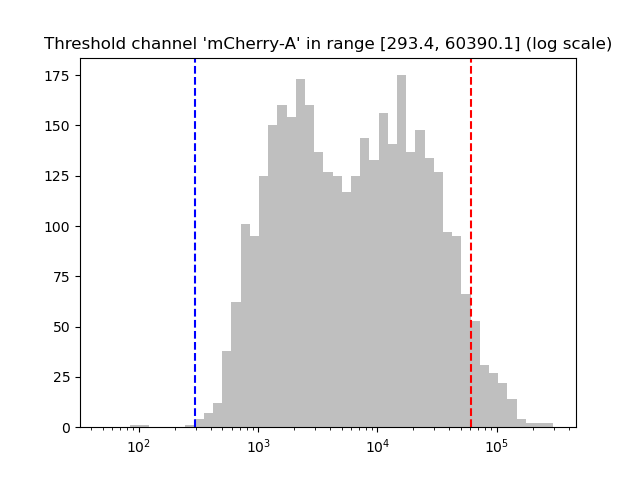

In [19]:
gate4 = InteractiveHistogramThreshold(
    data=df4,
    threshold_channel='mCherry-A',
    plot_channels=['mCherry-A'],
    log_scale = True
)

In [20]:
# import os
# import pandas as pd
# import FlowCal
# from glob import glob
# import numpy as np
# from tqdm import tqdm

# def auto_process(df, gating_strategy):
#     """
#     Apply a series of gating strategies to the dataframe
    
#     Parameters:
#     df (pd.DataFrame): Input dataframe
#     gating_strategy (list): List of gating strategies to apply
    
#     Returns:
#     pd.DataFrame: Dataframe after processing with all gating strategies
#     """
#     # Initial filtering - remove non-positive values
#     filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]
#     results = filtered_df.copy()
    
#     # Apply sequence of gating strategies
#     for gate in gating_strategy:
#         results = gate.apply_gate(results)
    
#     return results

# def process_all_fcs_files(folder_path, gating_strategy, file_pattern='*.fcs'):
#     """
#     Process all .fcs files in a folder matching the pattern
    
#     Parameters:
#     folder_path (str): Path to the folder containing .fcs files
#     gating_strategy (list): List of gating strategies to apply
#     file_pattern (str): File matching pattern, default is '*.fcs'
    
#     Returns:
#     tuple: (Merged DataFrame, dictionary of data for each file)
#     """
#     # Get all matching file paths
#     file_paths = glob(os.path.join(folder_path, file_pattern))
    
#     if not file_paths:
#         raise ValueError(f"No files matching '{file_pattern}' found in '{folder_path}'")
    
#     print(f"Found {len(file_paths)} files to process")
    
#     # Store processed DataFrames for each file
#     processed_dfs = {}
#     all_dfs = []
    
#     # Process each file
#     for file_path in tqdm(file_paths, desc="Processing files"):
#         file_name = os.path.basename(file_path)
        
#         try:
#             # Read .fcs file
#             data = FlowCal.io.FCSData(file_path)
            
#             # Extract metadata (optional)
#             metadata = {
#                 'file_name': file_name,
#                 'event_count': data.shape[0],
#                 # Can add more metadata
#             }
            
#             # Convert to DataFrame
#             df = pd.DataFrame(data, columns=data.channels)
            
#             # Add file identifier column
#             df['file_name'] = file_name
            
#             # Apply gating strategy
#             processed_df = auto_process(df, gating_strategy)
            
#             # Store results
#             processed_dfs[file_name] = {
#                 'data': processed_df,
#                 'metadata': metadata,
#                 'original_event_count': df.shape[0],
#                 'processed_event_count': processed_df.shape[0]
#             }
            
#             # Add to merge list
#             all_dfs.append(processed_df)
            
#             print(f"Processing complete: {file_name} - Original events: {df.shape[0]}, Processed events: {processed_df.shape[0]}")
            
#         except Exception as e:
#             print(f"Error processing file '{file_name}': {str(e)}")
    
#     # Merge all processed DataFrames
#     if all_dfs:
#         combined_df = pd.concat(all_dfs, ignore_index=True)
#         print(f"All files processed. Merged DataFrame contains {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")
#     else:
#         combined_df = pd.DataFrame()
#         print("No files were successfully processed.")
    
#     return combined_df, processed_dfs

# def save_results(combined_df, processed_dfs, output_folder, base_filename="processed_data"):
#     """
#     Save processing results
    
#     Parameters:
#     combined_df (pd.DataFrame): Merged dataframe
#     processed_dfs (dict): Dictionary of processing results for each file
#     output_folder (str): Output folder path
#     base_filename (str): Base filename
#     """
#     # Ensure output folder exists
#     os.makedirs(output_folder, exist_ok=True)
    
#     # Save merged DataFrame
#     if not combined_df.empty:
#         combined_path = os.path.join(output_folder, f"{base_filename}_combined.csv")
#         combined_df.to_csv(combined_path, index=False)
#         print(f"Merged data saved to: {combined_path}")
    
#     # Save processing statistics
#     stats = []
#     for file_name, info in processed_dfs.items():
#         stats.append({
#             'file_name': file_name,
#             'original_events': info['original_event_count'],
#             'processed_events': info['processed_event_count'],
#             'retention_rate': info['processed_event_count'] / info['original_event_count'] if info['original_event_count'] > 0 else 0
#         })
    
#     if stats:
#         stats_df = pd.DataFrame(stats)
#         stats_path = os.path.join(output_folder, f"{base_filename}_statistics.csv")
#         stats_df.to_csv(stats_path, index=False)
#         print(f"Processing statistics saved to: {stats_path}")
    
#     # Optional: Save each processed file separately
#     for file_name, info in processed_dfs.items():
#         file_base = os.path.splitext(file_name)[0]
#         individual_path = os.path.join(output_folder, f"{file_base}_processed.csv")
#         info['data'].to_csv(individual_path, index=False)


In [21]:

# Example usage
if __name__ == "__main__":
    # Gating strategy defined (assuming gating_strategy = [gate1, gate2, gate3] is already defined)
    gating_strategy = [gate1,gate2,gate3]
    folder_path = r'D:\FACS\Exp_20251028_1'
    output_folder = r'D:\FACS_analysis\Exp_20251028_1'

    # Process all .fcs files
    combined_df, processed_dfs = process_all_fcs_files(folder_path, gating_strategy)
    
    # Save results
    save_results(combined_df, processed_dfs, output_folder)
    
    # Display some basic statistics for the merged data
    if not combined_df.empty:
        print("\nBasic statistics:")
        print(f"Total event count: {combined_df.shape[0]}")
        print(f"Average events per file: {combined_df.shape[0] / len(processed_dfs):.2f}")
        
        # Group statistics by filename
        file_counts = combined_df.groupby('file_name').size()
        print("\nEvent count per file:")
        print(file_counts)

Found 96 files to process


Processing files:   0%|          | 0/96 [00:00<?, ?it/s]

Applied gate to new data. Selected 3586 out of 4869 items.
Processing complete: 01-Well-A1.fcs - Original events: 10000, Processed events: 3586
Applied gate to new data. Selected 4318 out of 5052 items.
Processing complete: 01-Well-A10.fcs - Original events: 10000, Processed events: 4318
Applied gate to new data. Selected 11 out of 13 items.
Processing complete: 01-Well-A11.fcs - Original events: 174, Processed events: 11
Applied gate to new data. Selected 2 out of 2 items.
Processing complete: 01-Well-A12.fcs - Original events: 129, Processed events: 2
Applied gate to new data. Selected 16 out of 43 items.
Processing complete: 01-Well-A2.fcs - Original events: 397, Processed events: 16
Applied gate to new data. Selected 1 out of 2 items.
Processing complete: 01-Well-A3.fcs - Original events: 172, Processed events: 1
Applied gate to new data. Selected 0 out of 1 items.
Processing complete: 01-Well-A4.fcs - Original events: 146, Processed events: 0
Applied gate to new data. Selected 340

Processing files:   8%|▊         | 8/96 [00:00<00:01, 65.13it/s]

Applied gate to new data. Selected 6 out of 9 items.
Processing complete: 01-Well-A6.fcs - Original events: 269, Processed events: 6
Applied gate to new data. Selected 1326 out of 2045 items.
Processing complete: 01-Well-A7.fcs - Original events: 9861, Processed events: 1326
Applied gate to new data. Selected 3220 out of 4398 items.
Processing complete: 01-Well-A8.fcs - Original events: 10000, Processed events: 3220
Applied gate to new data. Selected 1423 out of 2099 items.
Processing complete: 01-Well-A9.fcs - Original events: 10000, Processed events: 1423
Applied gate to new data. Selected 2362 out of 3230 items.
Processing complete: 01-Well-B1.fcs - Original events: 7956, Processed events: 2362
Applied gate to new data. Selected 99 out of 121 items.
Processing complete: 01-Well-B10.fcs - Original events: 393, Processed events: 99
Applied gate to new data. Selected 4136 out of 4945 items.
Processing complete: 01-Well-B11.fcs - Original events: 10000, Processed events: 4136


Processing files:  16%|█▌        | 15/96 [00:00<00:01, 46.74it/s]

Applied gate to new data. Selected 3991 out of 4949 items.
Processing complete: 01-Well-B12.fcs - Original events: 10000, Processed events: 3991
Applied gate to new data. Selected 5 out of 5 items.
Processing complete: 01-Well-B2.fcs - Original events: 141, Processed events: 5
Applied gate to new data. Selected 80 out of 207 items.
Processing complete: 01-Well-B3.fcs - Original events: 2447, Processed events: 80
Applied gate to new data. Selected 4323 out of 5175 items.
Processing complete: 01-Well-B4.fcs - Original events: 10000, Processed events: 4323
Applied gate to new data. Selected 517 out of 1105 items.
Processing complete: 01-Well-B5.fcs - Original events: 8460, Processed events: 517


Processing files:  21%|██        | 20/96 [00:00<00:01, 45.26it/s]

Applied gate to new data. Selected 22 out of 28 items.
Processing complete: 01-Well-B6.fcs - Original events: 245, Processed events: 22
Applied gate to new data. Selected 9 out of 12 items.
Processing complete: 01-Well-B7.fcs - Original events: 152, Processed events: 9
Applied gate to new data. Selected 5105 out of 6011 items.
Processing complete: 01-Well-B8.fcs - Original events: 10000, Processed events: 5105
Applied gate to new data. Selected 3771 out of 4538 items.
Processing complete: 01-Well-B9.fcs - Original events: 10000, Processed events: 3771
Applied gate to new data. Selected 5047 out of 6186 items.
Processing complete: 01-Well-C1.fcs - Original events: 10000, Processed events: 5047


Processing files:  26%|██▌       | 25/96 [00:00<00:01, 44.40it/s]

Applied gate to new data. Selected 2314 out of 2830 items.
Processing complete: 01-Well-C10.fcs - Original events: 4388, Processed events: 2314
Applied gate to new data. Selected 13 out of 17 items.
Processing complete: 01-Well-C11.fcs - Original events: 186, Processed events: 13
Applied gate to new data. Selected 4798 out of 5752 items.
Processing complete: 01-Well-C12.fcs - Original events: 10000, Processed events: 4798
Applied gate to new data. Selected 16 out of 22 items.
Processing complete: 01-Well-C2.fcs - Original events: 218, Processed events: 16
Applied gate to new data. Selected 24 out of 26 items.
Processing complete: 01-Well-C3.fcs - Original events: 188, Processed events: 24
Applied gate to new data. Selected 8 out of 10 items.
Processing complete: 01-Well-C4.fcs - Original events: 163, Processed events: 8
Applied gate to new data. Selected 3092 out of 3925 items.
Processing complete: 01-Well-C5.fcs - Original events: 10000, Processed events: 3092


Processing files:  33%|███▎      | 32/96 [00:00<00:01, 49.62it/s]

Applied gate to new data. Selected 11 out of 15 items.
Processing complete: 01-Well-C6.fcs - Original events: 198, Processed events: 11
Applied gate to new data. Selected 3932 out of 5332 items.
Processing complete: 01-Well-C7.fcs - Original events: 10000, Processed events: 3932
Applied gate to new data. Selected 5 out of 5 items.
Processing complete: 01-Well-C8.fcs - Original events: 104, Processed events: 5
Applied gate to new data. Selected 7 out of 11 items.
Processing complete: 01-Well-C9.fcs - Original events: 153, Processed events: 7
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 01-Well-D1.fcs - Original events: 97, Processed events: 1
Applied gate to new data. Selected 3121 out of 4272 items.
Processing complete: 01-Well-D10.fcs - Original events: 10000, Processed events: 3121
Applied gate to new data. Selected 13 out of 17 items.
Processing complete: 01-Well-D11.fcs - Original events: 162, Processed events: 13
Applied gate to new data. Selected 3309

Processing files:  42%|████▏     | 40/96 [00:00<00:01, 53.08it/s]

Applied gate to new data. Selected 583 out of 856 items.
Processing complete: 01-Well-D2.fcs - Original events: 1823, Processed events: 583
Applied gate to new data. Selected 3 out of 4 items.
Processing complete: 01-Well-D3.fcs - Original events: 95, Processed events: 3
Applied gate to new data. Selected 7 out of 10 items.
Processing complete: 01-Well-D4.fcs - Original events: 133, Processed events: 7
Applied gate to new data. Selected 3273 out of 4230 items.
Processing complete: 01-Well-D5.fcs - Original events: 10000, Processed events: 3273
Applied gate to new data. Selected 10 out of 12 items.
Processing complete: 01-Well-D6.fcs - Original events: 160, Processed events: 10
Applied gate to new data. Selected 2 out of 3 items.
Processing complete: 01-Well-D7.fcs - Original events: 115, Processed events: 2
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 01-Well-D8.fcs - Original events: 116, Processed events: 1
Applied gate to new data. Selected 1 out of 3 it

Processing files:  53%|█████▎    | 51/96 [00:00<00:00, 62.83it/s]

Applied gate to new data. Selected 2485 out of 3748 items.
Processing complete: 01-Well-E12.fcs - Original events: 10000, Processed events: 2485
Applied gate to new data. Selected 2213 out of 3168 items.
Processing complete: 01-Well-E2.fcs - Original events: 10000, Processed events: 2213
Applied gate to new data. Selected 23 out of 38 items.
Processing complete: 01-Well-E3.fcs - Original events: 346, Processed events: 23
Applied gate to new data. Selected 1849 out of 2727 items.
Processing complete: 01-Well-E4.fcs - Original events: 10000, Processed events: 1849
Applied gate to new data. Selected 245 out of 457 items.
Processing complete: 01-Well-E5.fcs - Original events: 3069, Processed events: 245
Applied gate to new data. Selected 3 out of 7 items.
Processing complete: 01-Well-E6.fcs - Original events: 190, Processed events: 3
Applied gate to new data. Selected 3769 out of 4798 items.
Processing complete: 01-Well-E7.fcs - Original events: 10000, Processed events: 3769


Processing files:  60%|██████    | 58/96 [00:01<00:00, 54.42it/s]

Applied gate to new data. Selected 2946 out of 3904 items.
Processing complete: 01-Well-E8.fcs - Original events: 10000, Processed events: 2946
Applied gate to new data. Selected 10 out of 18 items.
Processing complete: 01-Well-E9.fcs - Original events: 169, Processed events: 10
Applied gate to new data. Selected 6 out of 10 items.
Processing complete: 01-Well-F1.fcs - Original events: 147, Processed events: 6
Applied gate to new data. Selected 510 out of 967 items.
Processing complete: 01-Well-F10.fcs - Original events: 5342, Processed events: 510
Applied gate to new data. Selected 3699 out of 4508 items.
Processing complete: 01-Well-F11.fcs - Original events: 10000, Processed events: 3699
Applied gate to new data. Selected 4614 out of 5488 items.
Processing complete: 01-Well-F12.fcs - Original events: 10000, Processed events: 4614


Processing files:  67%|██████▋   | 64/96 [00:01<00:00, 51.99it/s]

Applied gate to new data. Selected 2970 out of 4112 items.
Processing complete: 01-Well-F2.fcs - Original events: 10000, Processed events: 2970
Applied gate to new data. Selected 5 out of 13 items.
Processing complete: 01-Well-F3.fcs - Original events: 147, Processed events: 5
Applied gate to new data. Selected 10 out of 22 items.
Processing complete: 01-Well-F4.fcs - Original events: 259, Processed events: 10
Applied gate to new data. Selected 4599 out of 5483 items.
Processing complete: 01-Well-F5.fcs - Original events: 10000, Processed events: 4599
Applied gate to new data. Selected 3187 out of 4361 items.
Processing complete: 01-Well-F6.fcs - Original events: 10000, Processed events: 3187
Applied gate to new data. Selected 10 out of 15 items.
Processing complete: 01-Well-F7.fcs - Original events: 174, Processed events: 10


Processing files:  73%|███████▎  | 70/96 [00:01<00:00, 50.02it/s]

Applied gate to new data. Selected 1967 out of 2883 items.
Processing complete: 01-Well-F8.fcs - Original events: 10000, Processed events: 1967
Applied gate to new data. Selected 11 out of 15 items.
Processing complete: 01-Well-F9.fcs - Original events: 172, Processed events: 11
Applied gate to new data. Selected 26 out of 40 items.
Processing complete: 01-Well-G1.fcs - Original events: 241, Processed events: 26
Applied gate to new data. Selected 2152 out of 3277 items.
Processing complete: 01-Well-G10.fcs - Original events: 10000, Processed events: 2152
Applied gate to new data. Selected 1856 out of 2841 items.
Processing complete: 01-Well-G11.fcs - Original events: 10000, Processed events: 1856
Applied gate to new data. Selected 1681 out of 2597 items.
Processing complete: 01-Well-G12.fcs - Original events: 10000, Processed events: 1681


Processing files:  79%|███████▉  | 76/96 [00:01<00:00, 48.40it/s]

Applied gate to new data. Selected 2405 out of 3193 items.
Processing complete: 01-Well-G2.fcs - Original events: 10000, Processed events: 2405
Applied gate to new data. Selected 2596 out of 3792 items.
Processing complete: 01-Well-G3.fcs - Original events: 10000, Processed events: 2596
Applied gate to new data. Selected 3780 out of 5286 items.
Processing complete: 01-Well-G4.fcs - Original events: 10000, Processed events: 3780
Applied gate to new data. Selected 40 out of 76 items.
Processing complete: 01-Well-G5.fcs - Original events: 336, Processed events: 40
Applied gate to new data. Selected 3 out of 13 items.
Processing complete: 01-Well-G6.fcs - Original events: 192, Processed events: 3


Processing files:  84%|████████▍ | 81/96 [00:01<00:00, 45.24it/s]

Applied gate to new data. Selected 4 out of 8 items.
Processing complete: 01-Well-G7.fcs - Original events: 141, Processed events: 4
Applied gate to new data. Selected 5 out of 28 items.
Processing complete: 01-Well-G8.fcs - Original events: 163, Processed events: 5
Applied gate to new data. Selected 3604 out of 4722 items.
Processing complete: 01-Well-G9.fcs - Original events: 10000, Processed events: 3604
Applied gate to new data. Selected 1716 out of 2738 items.
Processing complete: 01-Well-H1.fcs - Original events: 10000, Processed events: 1716
Applied gate to new data. Selected 8 out of 9 items.
Processing complete: 01-Well-H10.fcs - Original events: 172, Processed events: 8
Applied gate to new data. Selected 1379 out of 2015 items.
Processing complete: 01-Well-H11.fcs - Original events: 10000, Processed events: 1379


Processing files:  91%|█████████ | 87/96 [00:01<00:00, 48.79it/s]

Applied gate to new data. Selected 216 out of 258 items.
Processing complete: 01-Well-H12.fcs - Original events: 3468, Processed events: 216
Applied gate to new data. Selected 2543 out of 3531 items.
Processing complete: 01-Well-H2.fcs - Original events: 10000, Processed events: 2543
Applied gate to new data. Selected 31 out of 75 items.
Processing complete: 01-Well-H3.fcs - Original events: 272, Processed events: 31
Applied gate to new data. Selected 7 out of 17 items.
Processing complete: 01-Well-H4.fcs - Original events: 148, Processed events: 7
Applied gate to new data. Selected 4 out of 7 items.
Processing complete: 01-Well-H5.fcs - Original events: 199, Processed events: 4
Applied gate to new data. Selected 1579 out of 2510 items.
Processing complete: 01-Well-H6.fcs - Original events: 10000, Processed events: 1579
Applied gate to new data. Selected 2533 out of 3590 items.
Processing complete: 01-Well-H7.fcs - Original events: 10000, Processed events: 2533


Processing files:  98%|█████████▊| 94/96 [00:01<00:00, 49.88it/s]

Applied gate to new data. Selected 3809 out of 4930 items.
Processing complete: 01-Well-H8.fcs - Original events: 10000, Processed events: 3809
Applied gate to new data. Selected 10 out of 21 items.
Processing complete: 01-Well-H9.fcs - Original events: 158, Processed events: 10


Processing files: 100%|██████████| 96/96 [00:01<00:00, 50.56it/s]


All files processed. Merged DataFrame contains 142867 rows and 13 columns.
Merged data saved to: D:\FACS_analysis\Exp_20251028_1\processed_data_combined.csv
Processing statistics saved to: D:\FACS_analysis\Exp_20251028_1\processed_data_statistics.csv

Basic statistics:
Total event count: 142867
Average events per file: 1488.20

Event count per file:
file_name
01-Well-A1.fcs     3586
01-Well-A10.fcs    4318
01-Well-A11.fcs      11
01-Well-A12.fcs       2
01-Well-A2.fcs       16
                   ... 
01-Well-H5.fcs        4
01-Well-H6.fcs     1579
01-Well-H7.fcs     2533
01-Well-H8.fcs     3809
01-Well-H9.fcs       10
Length: 95, dtype: int64


In [22]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import os
# from matplotlib.ticker import ScalarFormatter

# def analyze_fl8_by_file(csv_path, output_folder=None):
#     """
#     Read processed CSV data, calculate FL8-A mean values grouped by file name and generate bar charts
    
#     Parameters:
#     csv_path (str): Path to the CSV file containing merged processed data
#     output_folder (str, optional): Output folder for charts, if not specified, charts will only be displayed
    
#     Returns:
#     pd.DataFrame: DataFrame containing FL8-A mean, standard deviation, and sample size for each file
#     """
#     # Set simple style
#     plt.style.use('seaborn-v0_8-pastel')
    
#     # Ensure output folder exists
#     if output_folder:
#         os.makedirs(output_folder, exist_ok=True)
    
#     # Read CSV file
#     print(f"Reading data file: {csv_path}")
#     df = pd.read_csv(csv_path)
    
#     # Check if necessary columns exist
#     if 'file_name' not in df.columns:
#         raise ValueError("Data is missing 'file_name' column")
#     if 'FL8-A' not in df.columns:
#         raise ValueError("Data is missing 'FL8-A' column")
    
#     print(f"Successfully read data with {df.shape[0]} rows and {df.shape[1]} columns")
    
#     # Group by file name and calculate FL8-A mean
#     fl8_stats = df.groupby('file_name')['FL8-A'].agg(['mean', 'std', 'count']).reset_index()
#     fl8_stats = fl8_stats.rename(columns={
#         'mean': 'FL8-A Mean', 
#         'std': 'FL8-A Std', 
#         'count': 'Sample Size'
#     })
    
#     # Calculate 95% confidence interval
#     fl8_stats['FL8-A CI'] = 1.96 * fl8_stats['FL8-A Std'] / np.sqrt(fl8_stats['Sample Size'])
    
#     # Extract key information from file names (assuming format: "Well-A1.fcs")
#     fl8_stats['Well'] = fl8_stats['file_name'].str.extract(r'([A-Z]\d+)')
    
#     print("FL8-A group statistics results:")
#     print(fl8_stats)
    
#     # Choose an appealing color
#     bar_color = '#4682B4'  # Steel Blue
    
#     # Create bar chart
#     plt.figure(figsize=(12, 6))
    
#     # Use seaborn to generate bar chart with single color
#     ax = sns.barplot(
#         x='file_name', 
#         y='FL8-A Mean', 
#         data=fl8_stats,
#         color=bar_color,
#         capsize=0.1,
#         alpha=0.8
#     )
    
#     # Add error bars (95% confidence interval)
#     for i, row in fl8_stats.iterrows():
#         ax.errorbar(
#             i, row['FL8-A Mean'], 
#             yerr=row['FL8-A CI'], 
#             fmt='none', 
#             c='black', 
#             capsize=5
#         )
    
#     # Adjust x-axis labels if there are many files
#     if len(fl8_stats) > 10:
#         plt.xticks(rotation=45, ha='right')
    
#     # Set chart title and labels
#     plt.title('Average FL8-A Values by File', fontsize=14)
#     plt.xlabel('File Name', fontsize=12)
#     plt.ylabel('FL8-A Mean Value', fontsize=12)
    
#     # Add data labels
#     for i, v in enumerate(fl8_stats['FL8-A Mean']):
#         ax.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=9)
    
#     # Optimize layout
#     plt.tight_layout()
    
#     # Save chart (if output folder is specified)
#     if output_folder:
#         output_path = os.path.join(output_folder, 'FL8-A_by_file.png')
#         plt.savefig(output_path, dpi=300)
#         print(f"Bar chart saved to: {output_path}")
    
#     # Display chart
#     plt.show()
    
#     # Create logarithmic scale version (if data range is large)
#     if fl8_stats['FL8-A Mean'].max() / fl8_stats['FL8-A Mean'].min() > 10:
#         plt.figure(figsize=(12, 6))
        
#         # Use seaborn to generate bar chart (log scale)
#         ax = sns.barplot(
#             x='file_name', 
#             y='FL8-A Mean', 
#             data=fl8_stats,
#             color=bar_color,
#             capsize=0.1,
#             alpha=0.8
#         )
        
#         # Set logarithmic scale
#         plt.yscale('log')
        
#         # Format y-axis labels as normal numbers (not scientific notation)
#         ax.yaxis.set_major_formatter(ScalarFormatter())
        
#         # Adjust x-axis labels if there are many files
#         if len(fl8_stats) > 10:
#             plt.xticks(rotation=45, ha='right')
        
#         # Set chart title and labels
#         plt.title('Average FL8-A Values by File (Log Scale)', fontsize=14)
#         plt.xlabel('File Name', fontsize=12)
#         plt.ylabel('FL8-A Mean Value (Log Scale)', fontsize=12)
        
#         # Optimize layout
#         plt.tight_layout()
        
#         # Save chart (if output folder is specified)
#         if output_folder:
#             output_path = os.path.join(output_folder, 'FL8-A_by_file_log_scale.png')
#             plt.savefig(output_path, dpi=300)
#             print(f"Log scale bar chart saved to: {output_path}")
        
#         # Display chart
#         plt.show()
    
#     # Create version sorted by sample size
#     plt.figure(figsize=(12, 6))
    
#     # Sort by sample size
#     fl8_stats_sorted = fl8_stats.sort_values('Sample Size', ascending=False)
    
#     # Generate bar chart
#     ax = sns.barplot(
#         x='file_name', 
#         y='FL8-A Mean', 
#         data=fl8_stats_sorted,
#         order=fl8_stats_sorted['file_name'],
#         color=bar_color,
#         capsize=0.1,
#         alpha=0.8
#     )
    
#     # Add error bars
#     for i, (_, row) in enumerate(fl8_stats_sorted.iterrows()):
#         ax.errorbar(
#             i, row['FL8-A Mean'], 
#             yerr=row['FL8-A CI'], 
#             fmt='none', 
#             c='black', 
#             capsize=5
#         )
    
#     # Adjust x-axis labels if there are many files
#     if len(fl8_stats) > 10:
#         plt.xticks(rotation=45, ha='right')
    
#     # Set chart title and labels
#     plt.title('Average FL8-A Values by File (Sorted by Sample Size)', fontsize=14)
#     plt.xlabel('File Name', fontsize=12)
#     plt.ylabel('FL8-A Mean Value', fontsize=12)
    
#     # Optimize layout
#     plt.tight_layout()
    
#     # Save chart (if output folder is specified)
#     if output_folder:
#         output_path = os.path.join(output_folder, 'FL8-A_by_file_sorted.png')
#         plt.savefig(output_path, dpi=300)
#         print(f"Bar chart sorted by sample size saved to: {output_path}")
    
#     # Display chart
#     plt.show()
    
#     # Output CSV statistics
#     if output_folder:
#         stats_path = os.path.join(output_folder, 'FL8-A_statistics.csv')
#         fl8_stats.to_csv(stats_path, index=False)
#         print(f"FL8-A statistics saved to: {stats_path}")
    
#     return fl8_stats


Reading data file: D:\FACS_analysis\Exp_20251028_1\processed_data_combined.csv
Successfully read data with 142867 rows and 13 columns
mCherry-A group statistics results:
          file_name  mCherry-A Mean  mCherry-A Std  Sample Size  mCherry-A CI  \
0    01-Well-A1.fcs    1.505926e+04   2.259386e+04         3586  7.395054e+02   
1   01-Well-A10.fcs    6.780039e+03   1.368239e+04         4318  4.081094e+02   
2   01-Well-A11.fcs    4.117509e+03   6.096795e+03           11  3.602975e+03   
3   01-Well-A12.fcs    1.113800e+03   6.208398e+02            2  8.604400e+02   
4    01-Well-A2.fcs    1.714214e+04   1.430392e+04           16  7.008921e+03   
..              ...             ...            ...          ...           ...   
90   01-Well-H5.fcs    2.392862e+06   2.905361e+06            4  2.847254e+06   
91   01-Well-H6.fcs    7.124562e+03   8.014650e+03         1579  3.953207e+02   
92   01-Well-H7.fcs    6.779858e+03   9.511744e+03         2533  3.704236e+02   
93   01-Well-H8.fcs 

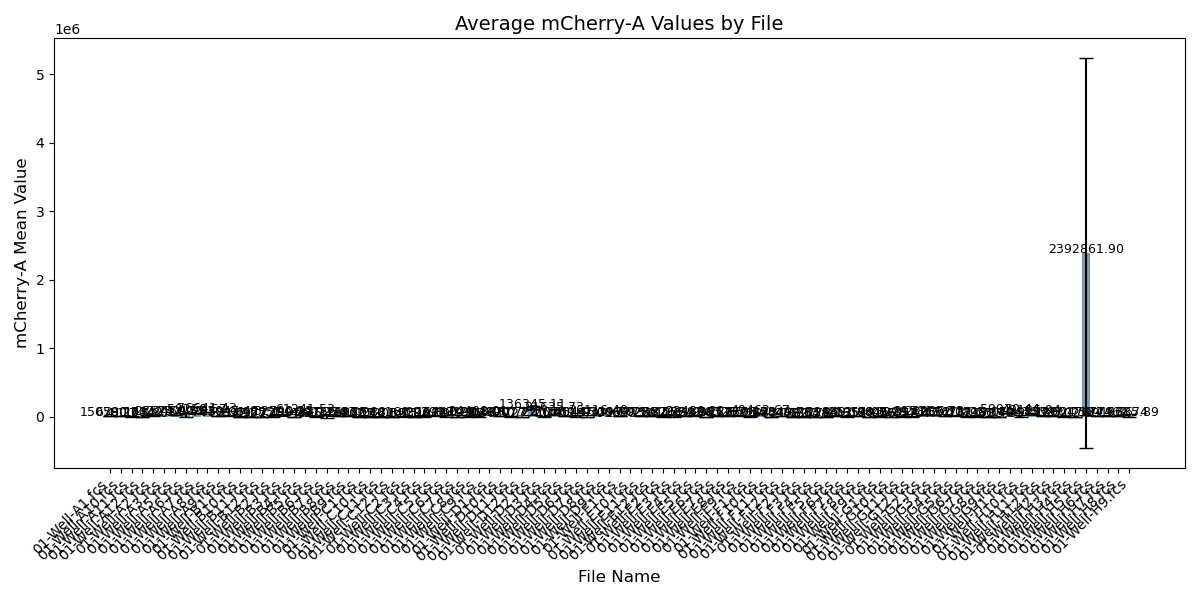

Log scale bar chart saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\mCherry-A_by_file_log_scale.png


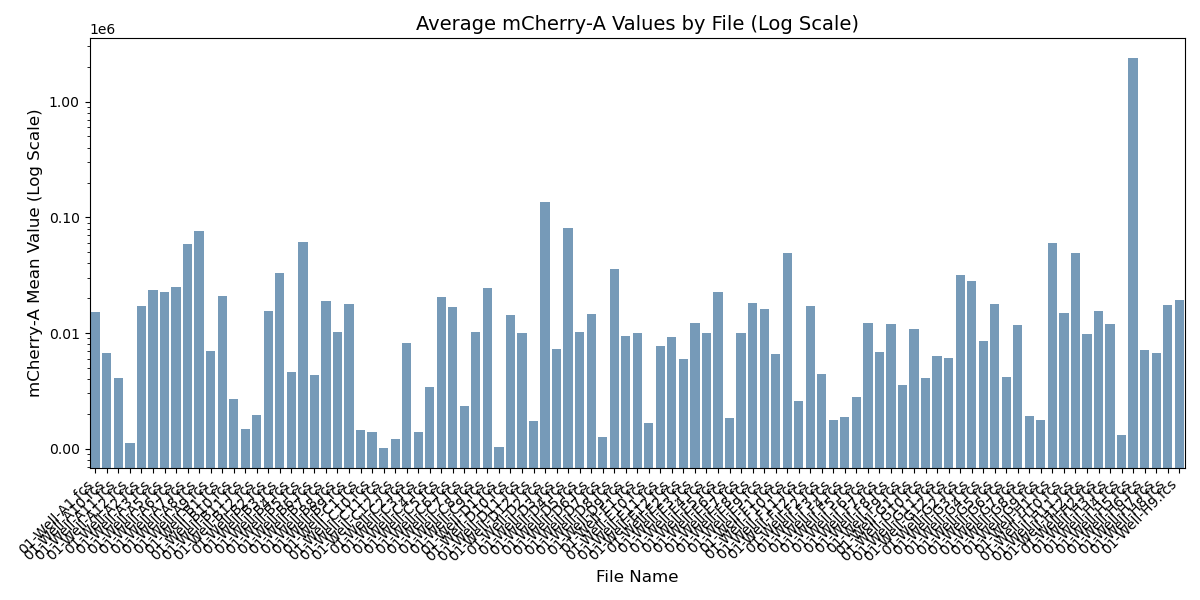

Bar chart sorted by sample size saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\mCherry-A_by_file_sorted.png


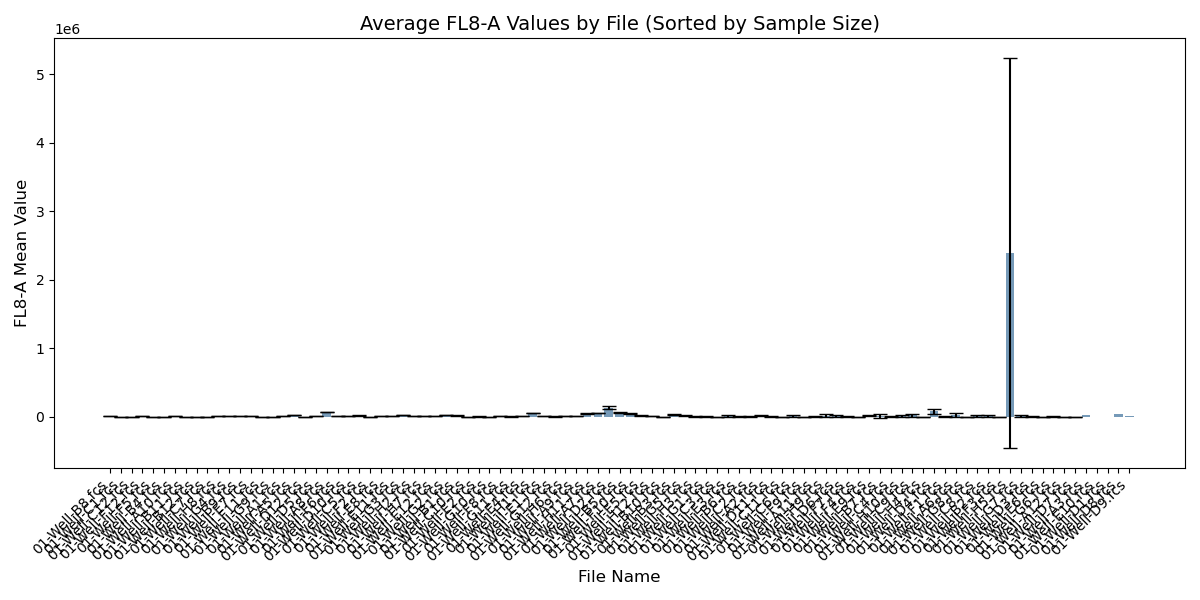

mCherry-A statistics saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\mCherry-A_statistics.csv


In [23]:

# Example usage
if __name__ == "__main__":
    # Set file paths
    csv_path = r'D:\FACS_analysis\Exp_20251028_1\processed_data_combined.csv'
    output_folder = r'D:\FACS_analysis\Exp_20251028_1\analysis_results'

    # Analyze data and generate charts
    mCherry_A_stats = analyze_channel_by_file(csv_path, output_folder, channel='mCherry-A')

Loaded utils_plots from:  c:\Users\mingzhchen\Documents\Git\Open_flow\20250407\..\utils_plots.py
Functions: ['analyze_channel_by_file', 'plot_channel_heatmap', 'plot_channel_heatmap_min_count', 'plot_channel_heatmaps_by_plate', 'plot_channel_heatmaps_by_plate_min_count']
Reading data file for multi-plate heatmaps: D:\FACS_analysis\Exp_20251028_1\processed_data_combined.csv
c:\Users\mingzhchen\Documents\Git\Open_flow\20250407\..\utils_plots.py
Functions: ['analyze_channel_by_file', 'plot_channel_heatmap', 'plot_channel_heatmap_min_count', 'plot_channel_heatmaps_by_plate', 'plot_channel_heatmaps_by_plate_min_count']
Reading data file for multi-plate heatmaps: D:\FACS_analysis\Exp_20251028_1\processed_data_combined.csv

Generating heatmaps for plate 01 with 142867 events...

Generating heatmaps for plate 01 with 142867 events...
Heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\mCherry-A_plate_heatmap_mean_log.png
Heatmap saved to: D:\FACS_analysis\Exp_20251028_1

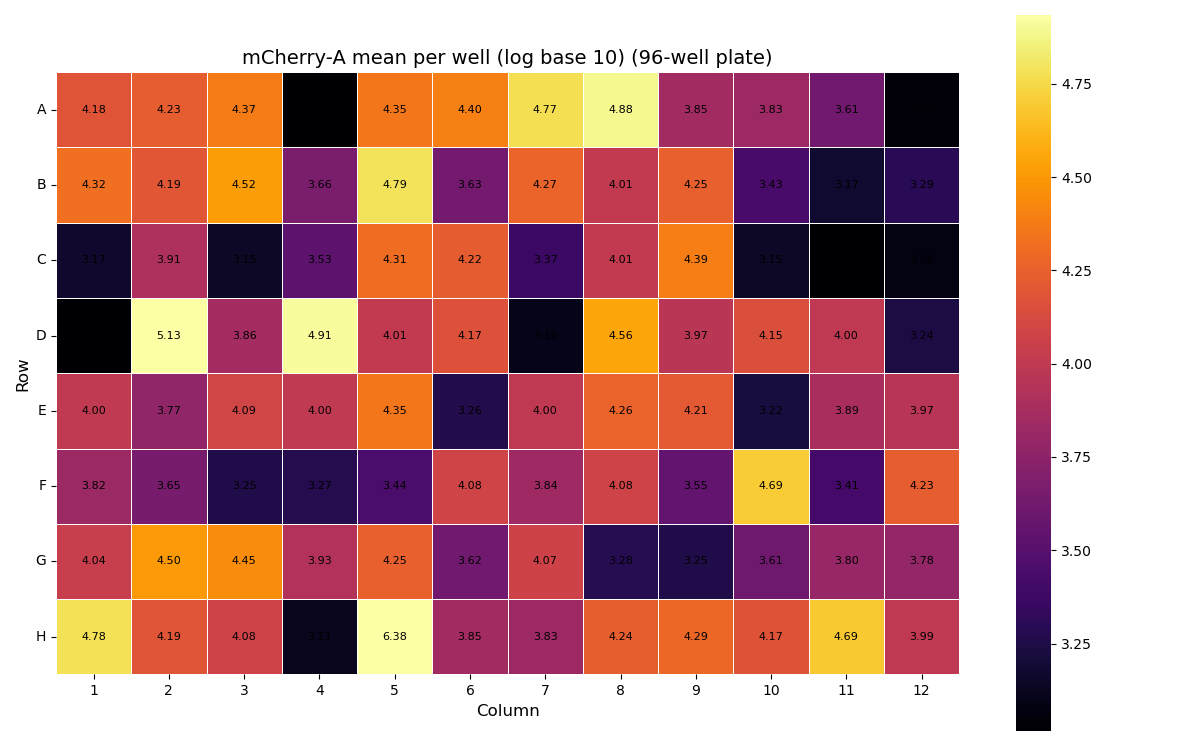

Counts heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\mCherry-A_plate_heatmap_counts.png



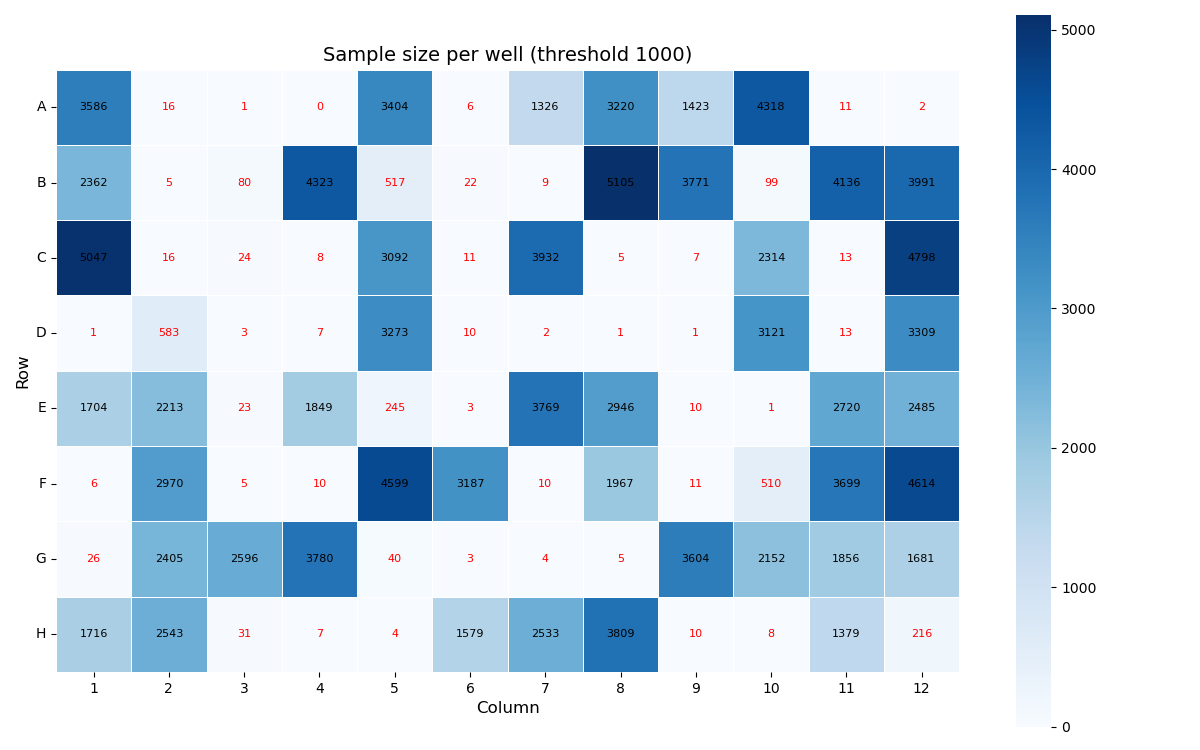

Std heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\mCherry-A_plate_heatmap_std.png



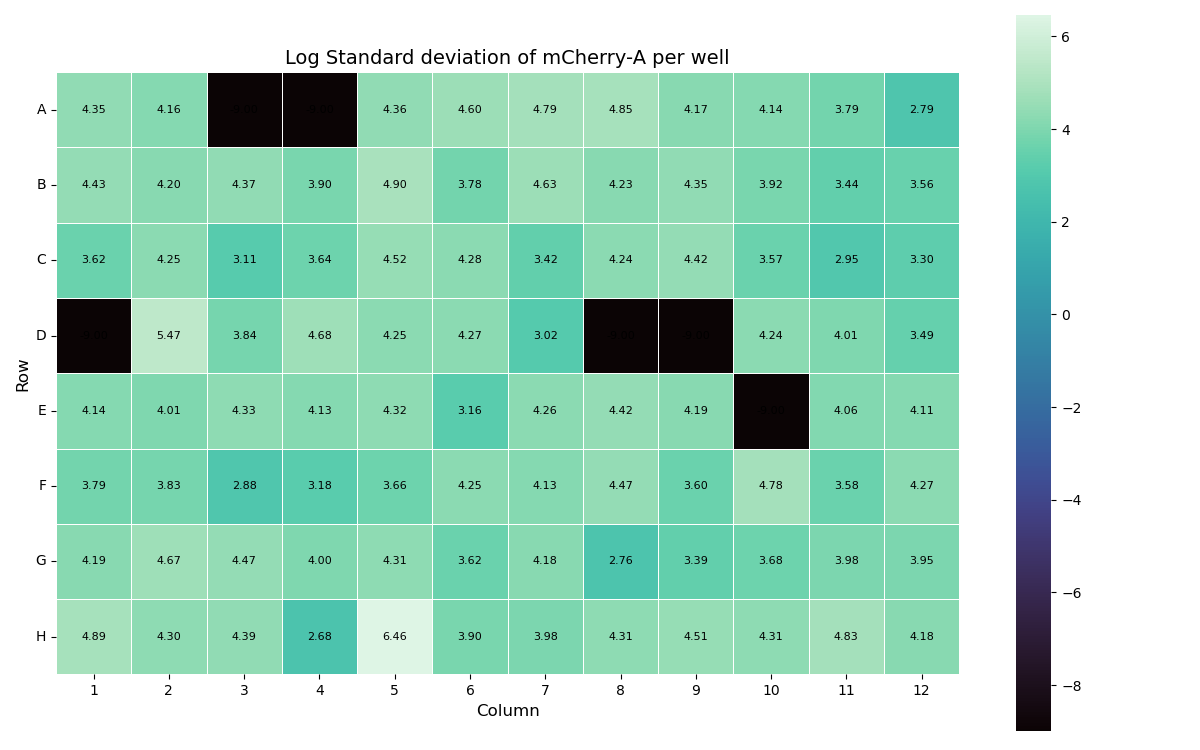

Aggregated well values saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\mCherry-A_plate_aggregated_mean.csv



{'01':    Well Row  Col         Value  ValueLog   Count           Std    StdLog  \
 0    A1   A    1  15059.256832  4.177804  3586.0  22593.859553  4.353990   
 1    A2   A    2  17142.137500  4.234065    16.0  14303.920284  4.155455   
 2    A3   A    3  23574.900000  4.372450     1.0      0.000000 -9.000000   
 3    A4   A    4      0.000000 -9.000000     0.0      0.000000 -9.000000   
 4    A5   A    5  22460.521857  4.351420  3404.0  22649.303994  4.355055   
 ..  ...  ..  ...           ...       ...     ...           ...       ...   
 91   H8   H    8  17462.737543  4.242112  3809.0  20470.111487  4.311120   
 92   H9   H    9  19385.890000  4.287486    10.0  32485.192067  4.511685   
 93  H10   H   10  14943.275000  4.174446     8.0  20599.946150  4.313866   
 94  H11   H   11  49196.938869  4.691938  1379.0  67561.948716  4.829702   
 95  H12   H   12   9839.624537  3.992979   216.0  15080.421927  4.178413   
 
     LowCountFlag  
 0          False  
 1           True  
 2      

In [38]:
import os, sys, inspect, importlib

# Ensure repo root is on path
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if repo_root not in sys.path:
    sys.path.append(repo_root)

import utils_plots
importlib.reload(utils_plots)
print('Loaded utils_plots from:', utils_plots.__file__)
print('Functions:', [n for n, o in inspect.getmembers(utils_plots, inspect.isfunction)])

from utils_plots import plot_channel_heatmap, plot_channel_heatmaps_by_plate

# Quick sanity: build a tiny fake dataset if target csv not present
csv_path = r'D:\FACS_analysis\Exp_20251028_1\processed_data_combined.csv'
output_folder = r'D:\FACS_analysis\Exp_20251028_1\analysis_results'

if not os.path.isfile(csv_path):
    import pandas as pd
    wells = [f"{r}{c}" for r in 'ABCDEFGH' for c in range(1,13)]
    # Simulate per-event data (5 events per well)
    rows = []
    import random
    for w in wells:
        for _ in range(5):
            # simulate two plates '01' and '02'
            plate = random.choice(['01','02'])
            rows.append({'file_name': f'{plate}-Well-{w}.fcs', 'mCherry-A': random.uniform(100, 500)})
    fake_df = pd.DataFrame(rows)
    fake_path = os.path.join(output_folder, 'fake_processed_data.csv')
    os.makedirs(output_folder, exist_ok=True)
    fake_df.to_csv(fake_path, index=False)
    csv_path = fake_path
    print('Using simulated dataset at', csv_path)

# Generate heatmaps per plate: value, counts, std for each plate separately
plot_channel_heatmaps_by_plate(
    csv_path,
    output_folder,
    channel='mCherry-A',
    agg='mean',
    cmap='inferno',
    value_log=True,
    value_log_base=10.0,
    annotate=True,
    robust=True,
    min_count_threshold=1000,
    plot_counts=True,
    plot_std=True,
    count_cmap='Blues',
    std_cmap='mako',
)

Reading data file for min-count filtering: D:\FACS_analysis\Exp_20251028_1\processed_data_combined.csv

Heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\minCount_1000\mCherry-A_plate_heatmap_mean_log.png
Heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\minCount_1000\mCherry-A_plate_heatmap_mean_log.png


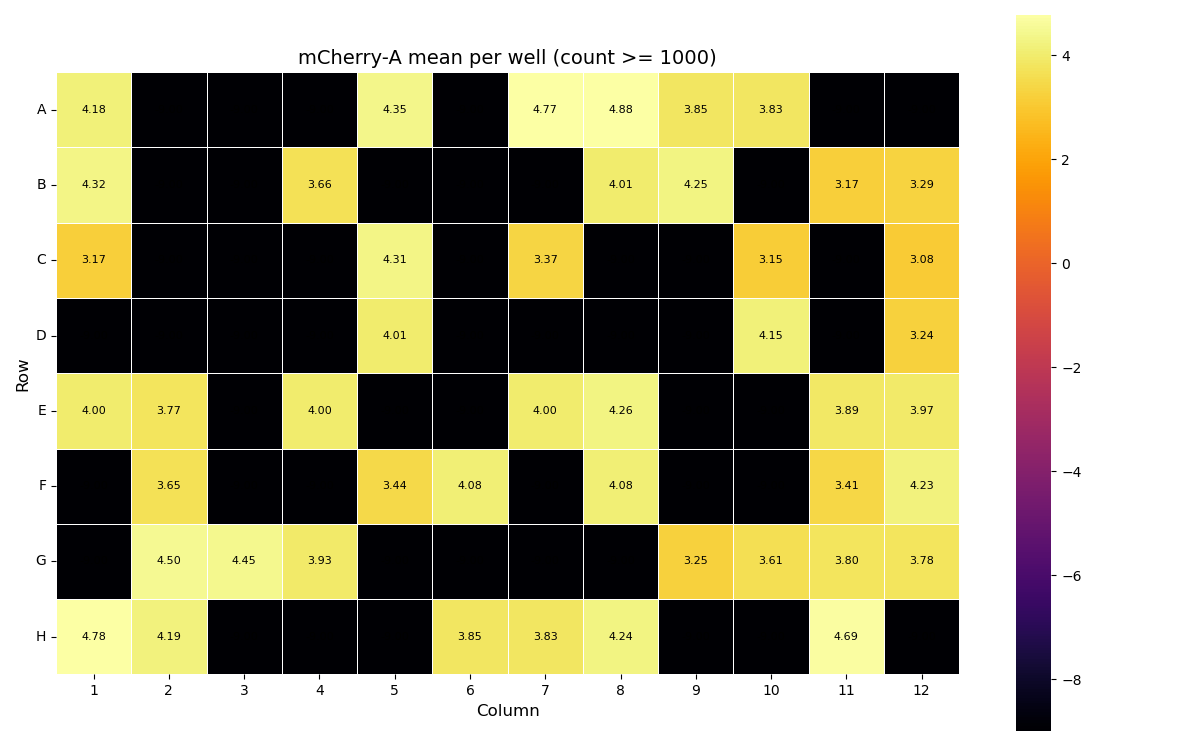

Counts heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\minCount_1000\mCherry-A_plate_heatmap_counts.png



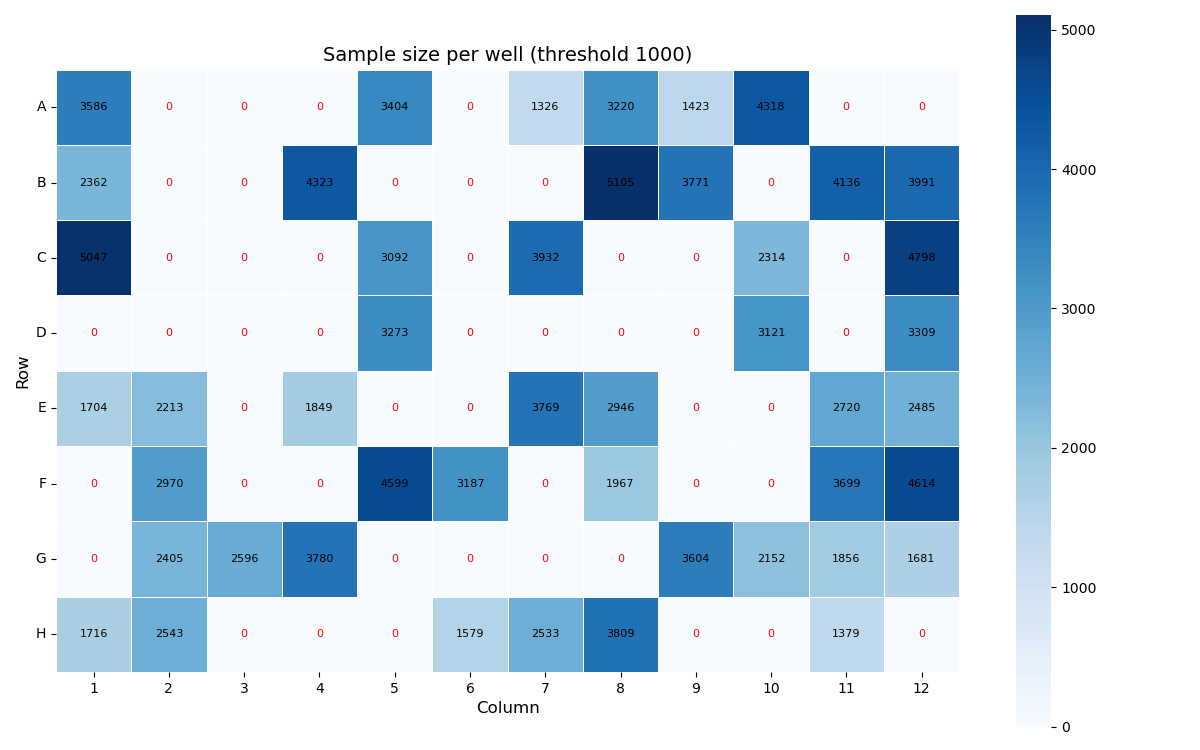

Std heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\minCount_1000\mCherry-A_plate_heatmap_std.png



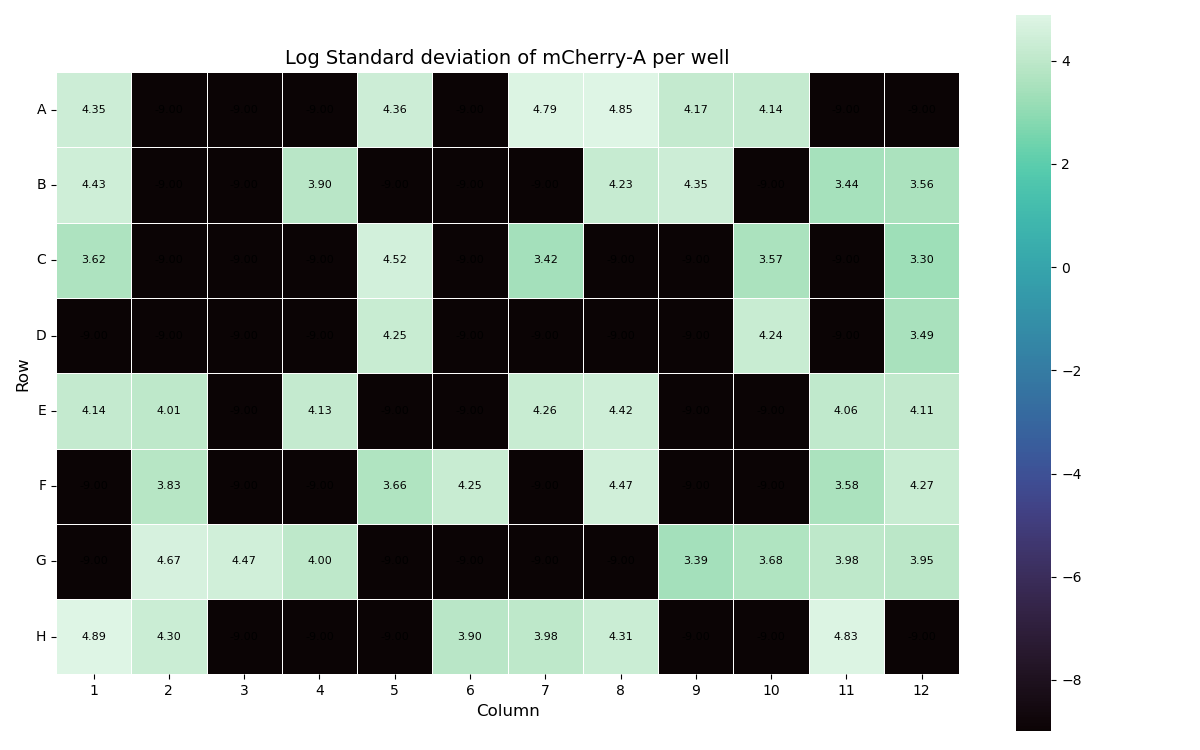

Aggregated well values saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\minCount_1000\mCherry-A_plate_aggregated_mean.csv



,Well,Row,Col,Value,ValueLog,Count,Std,StdLog,LowCountFlag
0,A1,A,1,15059.256832,4.177804,3586.0,22593.859553,4.353990,False
1,A2,A,2,0.000000,-9.000000,0.0,0.000000,-9.000000,True
2,A3,A,3,0.000000,-9.000000,0.0,0.000000,-9.000000,True
3,A4,A,4,0.000000,-9.000000,0.0,0.000000,-9.000000,True
4,A5,A,5,22460.521857,4.351420,3404.0,22649.303994,4.355055,False
...,...,...,...,...,...,...,...,...,...
91,H8,H,8,17462.737543,4.242112,3809.0,20470.111487,4.311120,False
92,H9,H,9,0.000000,-9.000000,0.0,0.000000,-9.000000,True
93,H10,H,10,0.000000,-9.000000,0.0,0.000000,-9.000000,True
94,H11,H,11,49196.938869,4.691938,1379.0,67561.948716,4.829702,False


In [39]:
# Plot value heatmap masking wells with sample count < threshold (set to 0)
from utils_plots import plot_channel_heatmap_min_count

threshold = 1000
plot_channel_heatmap_min_count(
    csv_path=csv_path,
    data=None,
    output_folder=output_folder,
    channel='mCherry-A',
    threshold=threshold,
    agg='mean',
    cmap='inferno',
    value_log=True,
    value_log_base=10.0,
    annotate=True,
    robust=True,
    plot_counts=True,
    plot_std=True,
    count_cmap='Blues',
    std_cmap='mako',
)

Reading data file for multi-plate min-count heatmaps: D:\FACS_analysis\Exp_20251028_1\processed_data_combined.csv


Generating min-count heatmaps for plate 01 with threshold 1000 and 142867 events...

Generating min-count heatmaps for plate 01 with threshold 1000 and 142867 events...
Heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\minCount_1000\mCherry-A_plate_heatmap_mean_log.png
Heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\minCount_1000\mCherry-A_plate_heatmap_mean_log.png


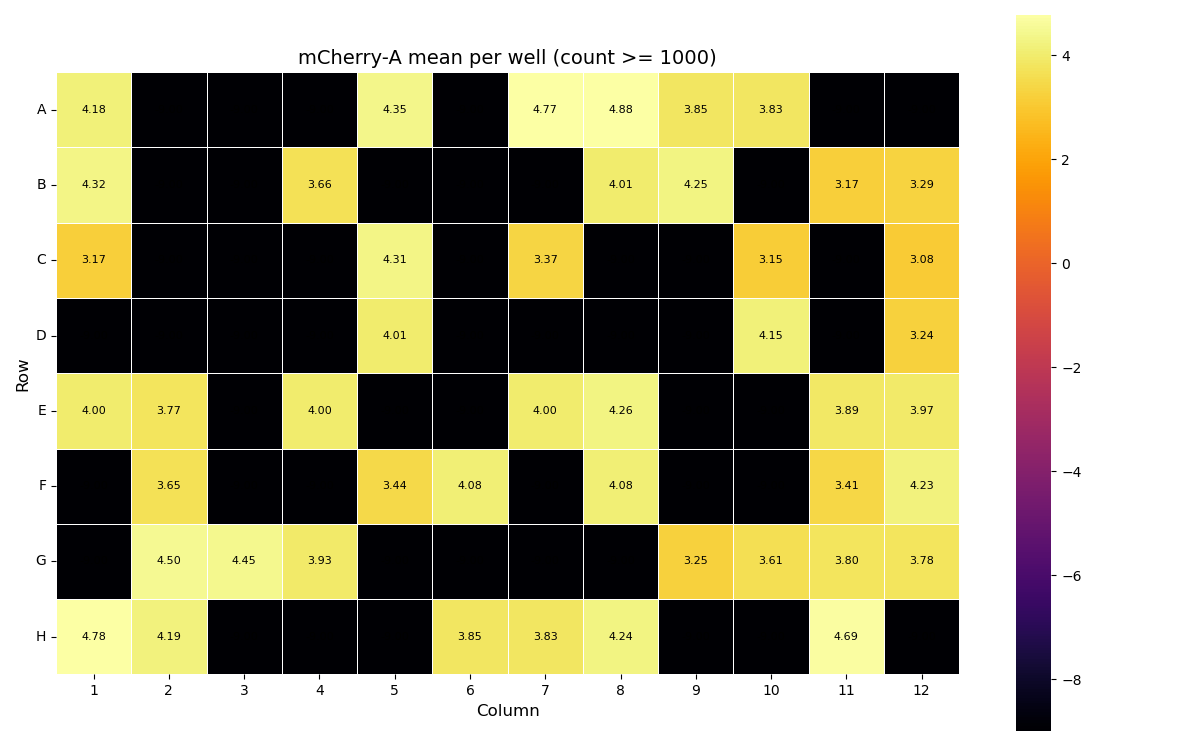

Counts heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\minCount_1000\mCherry-A_plate_heatmap_counts.png



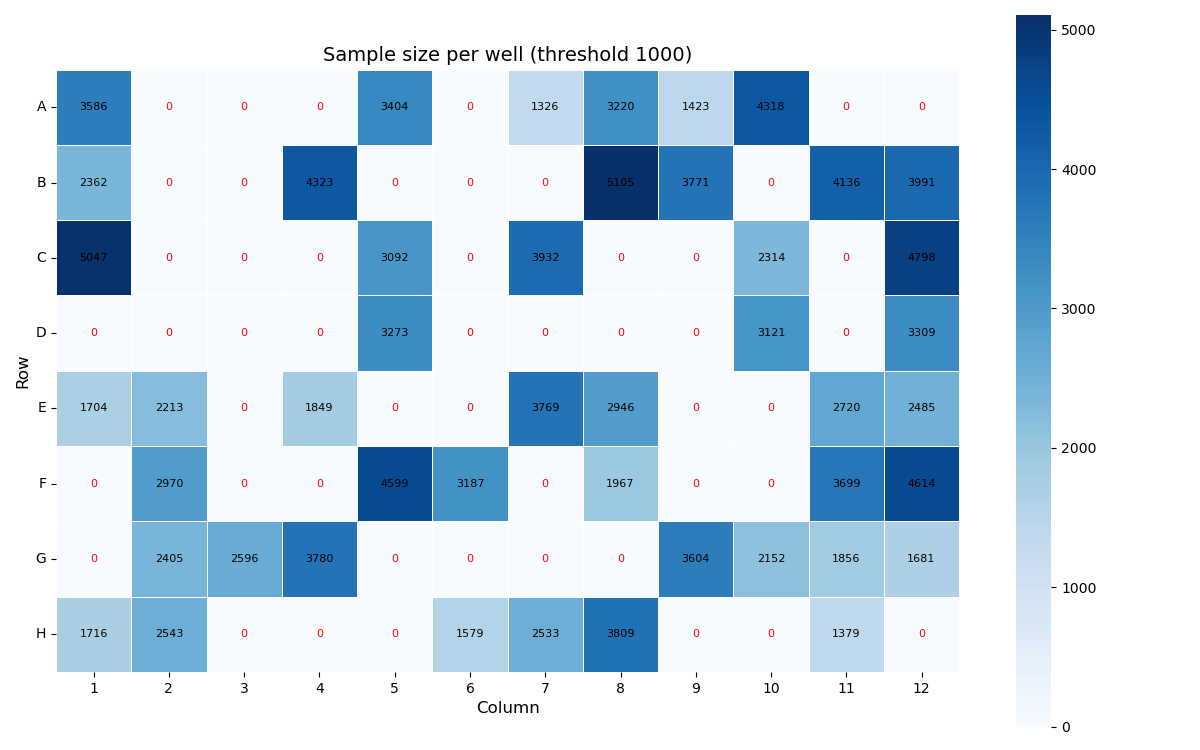

Std heatmap saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\minCount_1000\mCherry-A_plate_heatmap_std.png



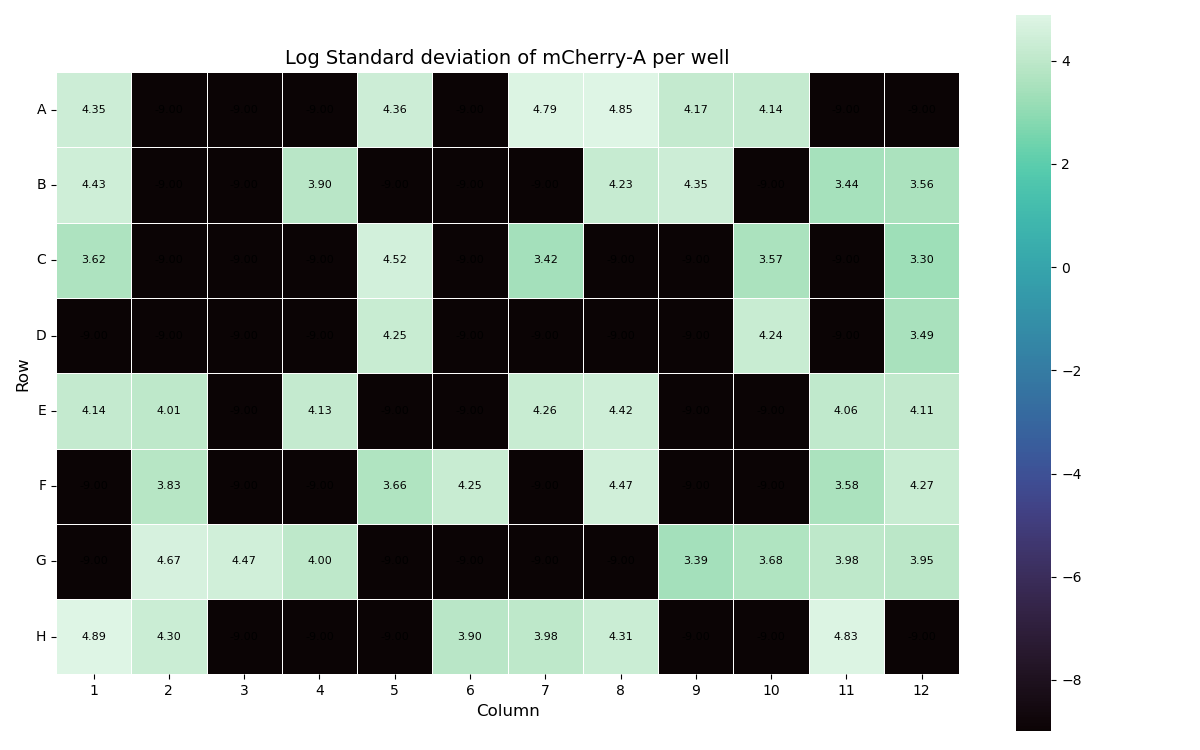

Aggregated well values saved to: D:\FACS_analysis\Exp_20251028_1\analysis_results\plate_01\minCount_1000\mCherry-A_plate_aggregated_mean.csv



{'01':    Well Row  Col         Value  ValueLog   Count           Std    StdLog  \
 0    A1   A    1  15059.256832  4.177804  3586.0  22593.859553  4.353990   
 1    A2   A    2      0.000000 -9.000000     0.0      0.000000 -9.000000   
 2    A3   A    3      0.000000 -9.000000     0.0      0.000000 -9.000000   
 3    A4   A    4      0.000000 -9.000000     0.0      0.000000 -9.000000   
 4    A5   A    5  22460.521857  4.351420  3404.0  22649.303994  4.355055   
 ..  ...  ..  ...           ...       ...     ...           ...       ...   
 91   H8   H    8  17462.737543  4.242112  3809.0  20470.111487  4.311120   
 92   H9   H    9      0.000000 -9.000000     0.0      0.000000 -9.000000   
 93  H10   H   10      0.000000 -9.000000     0.0      0.000000 -9.000000   
 94  H11   H   11  49196.938869  4.691938  1379.0  67561.948716  4.829702   
 95  H12   H   12      0.000000 -9.000000     0.0      0.000000 -9.000000   
 
     LowCountFlag  
 0          False  
 1           True  
 2      

In [40]:
# Multi-plate heatmaps with min-count filtering
from utils_plots import plot_channel_heatmaps_by_plate_min_count
min_count_threshold = 1000
plot_channel_heatmaps_by_plate_min_count(
    csv_path=csv_path,
    output_folder=output_folder,
    channel='mCherry-A',
    threshold=min_count_threshold,
    agg='mean',
    cmap='inferno',
    value_log=True,
    value_log_base=10.0,
    annotate=True,
    robust=True,
    plot_counts=True,
    plot_std=True,
    count_cmap='Blues',
    std_cmap='mako',
)